In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns
import matplotlib.pyplot as plt
from math import isnan
#import plotly.tools as tls

In [5]:
data = pd.read_csv('imdb.csv')
data.head()

,Rank,Title,Genre1,Genre2,Genre3,Director,Actors1,Actors2,Actors3,Actors4,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,Action,Adventure,Sci-Fi,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,Mystery,Sci-Fi,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,Thriller,NaN,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.12,62.0
3,4,Sing,Animation,Comedy,Family,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,Adventure,Fantasy,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.02,40.0


In [49]:

director_counts = data["Director"].value_counts()
director_counts
top_ten = director_counts[0:10]
top_ten

Ridley Scott          8
Michael Bay           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
David Yates           6
Denis Villeneuve      5
J.J. Abrams           5
Martin Scorsese       5
Danny Boyle           5
Peter Berg            5
Name: Director, dtype: int64

In [7]:
Genre_play = {}

for Genre_name in data['Genre1'].dropna():
    if Genre_name not in Genre_play.keys():
        Genre_play[Genre_name] = 1
    else:
        Genre_play[Genre_name] = Genre_play[Genre_name] + 1
        
for Genre_name in data['Genre2'].dropna():
    if Genre_name not in Genre_play.keys():
        Genre_play[Genre_name] = 1
    else:
        Genre_play[Genre_name] = Genre_play[Genre_name] + 1
Genre_play

{'Action': 303,
 'Adventure': 250,
 'Horror': 95,
 'Animation': 49,
 'Comedy': 237,
 'Biography': 79,
 'Drama': 433,
 'Crime': 129,
 'Romance': 71,
 'Mystery': 62,
 'Thriller': 62,
 'Sci-Fi': 31,
 'Fantasy': 39,
 'Family': 27,
 'History': 8,
 'Music': 8,
 'Western': 2,
 'War': 4,
 'Musical': 1,
 'Sport': 5}

([<matplotlib.axis.XTick at 0x2b1fc7bd390>,
 <a list of 20 Text xticklabel objects>)

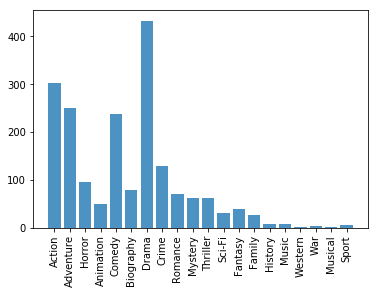

In [12]:
dictionary = plt.figure()

plt.bar(range(len(Genre_play)), Genre_play.values(), alpha=0.8, align='center')
plt.xticks(range(len(Genre_play)), Genre_play.keys(), rotation="vertical")


In [68]:
Genre_play
#clean_genre = del Genre_play['nan']
#clean_genre



{'Action': 303,
 'Adventure': 250,
 'Horror': 95,
 'Animation': 49,
 'Comedy': 237,
 'Biography': 79,
 'Drama': 433,
 'Crime': 129,
 'Romance': 71,
 'Mystery': 62,
 'Thriller': 62,
 'Sci-Fi': 31,
 'Fantasy': 39,
 nan: 105,
 'Family': 27,
 'History': 8,
 'Music': 8,
 'Western': 2,
 'War': 4,
 'Musical': 1,
 'Sport': 5}

In [53]:
#plt.bar(sorted_by_play[0],height=sorted_by_play[1], color='r', alpha=0.5, align="center")

In [54]:
actor_play = {}

for actor_name in data['Actors1']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1
        
for actor_name in data['Actors2']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1

for actor_name in data['Actors3']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1

In [55]:
sorted_by_play = sorted(actor_play.items(), key=itemgetter(1), reverse=True)

In [56]:
top_ten = sorted_by_play[0:10]

In [57]:
top_ten

[('Christian Bale', 11),
 ('Mark Wahlberg', 11),
 ('Will Smith', 9),
 ('Denzel Washington', 9),
 ('Brad Pitt', 9),
 ('Leonardo DiCaprio', 9),
 ('Jake Gyllenhaal', 9),
 ('Adam Sandler', 9),
 ('Johnny Depp', 8),
 ('Tom Hanks', 8)]

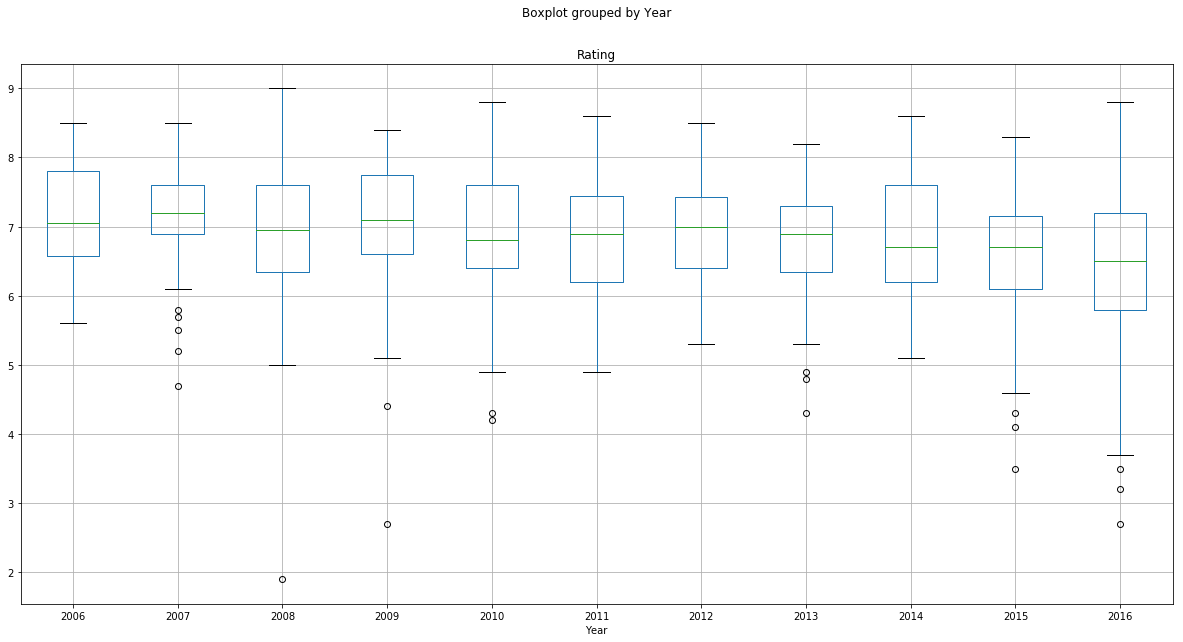

In [58]:
data.boxplot("Rating", by="Year", figsize=(20, 10))

In [59]:
#(t_stat, p) = ttest_ind(data['Rating'], data['Revenue (Millions)'], equal_var=False)

#if p < 0.05:
    #print("The differences between the high and low prices are significant.")
#else:
   # print("The differences between high and low prices are due to chance.")
 # Use scipy.stats.ttest_ind.
#t, p = ttest_ind(data['Rating'], data['Revenue (Millions)'], equal_var=False)
#print("ttest_ind:            t = %g  p = %g" % (t, p))

# Compute the descriptive statistics of a and b.
abar = data['Rating'].mean()
avar = data['Rating'].var(ddof=1)
na = data['Rating'].size
adof = na - 1

bbar = data['Revenue (Millions)'].mean()
bvar = data['Revenue (Millions)'].var(ddof=1)
nb = data['Revenue (Millions)'].size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))   
if p < 0.05:
    print("significant affect")
else:
    print("no significant affect")
 # Use scipy.stats.ttest_ind.

ttest_ind_from_stats: t = -23.3465  p = 1.47919e-96
formula:              t = -23.3465  p = 1.47919e-96


NameError: name 'p' is not defined

In [ ]:
data.boxplot("Votes", by="Year", figsize=(20, 10))

In [ ]:
meta=data['Metascore']/10

In [ ]:
abar = data['Rating'].mean()
avar = data['Rating'].var(ddof=1)
na = data['Rating'].size
adof = na - 1

bbar = meta.mean()
bvar = meta.var(ddof=1)
nb = meta.size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))   
if p < 0.05:
    print("significant diffrence")
else:
    print("no significant diffrence")

In [ ]:
sns.distplot(data['Rating'])

In [ ]:
population1 = data['Rating']
population2 = data['Metascore']

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

In [ ]:
#sns.distplot(data['Metascore'])

df = data[np.isfinite(data['Metascore'])]
#df
sns.distplot(df['Metascore'])

In [ ]:
bbar = meta.mean()
abar = data['Rating'].mean()
print(bbar)
print(abar)